# Bài tập nhóm số 1
## Nhóm : Nhà Họ Lê
#### Thành Viên
- Lê Thế Phú
- Lê Quang Luân
- Lê Thanh Tuấn
- Lê Phước Chớ
- Lê Đại Minh Phú Quý

### Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Câu 1
##### Dùng thư viện Pandas đọc file

In [2]:
Weight_height = pd.read_csv('./weight-height.csv',sep=',')

### Câu 2
##### Đọc dữ liệu từ file đó và chuyển 2 cột Height và Weight từ inch và pound về cm và kg. Inra Head().

In [3]:
# convert inches to centimeters
# 1 inch = 2.54 centimeters 
Weight_height.Height = Weight_height.Height.apply(lambda x: x * 2.54)

# convert pound to kilograms
# 1 kg = 2.205 pound => 1 pound = 1 / 2.205 kg
Weight_height.Weight = Weight_height.Weight.apply(lambda x: x * (1 / 2.205))
Weight_height.head()

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676


### Câu 3
##### Vẽ dữ liệu lên trục toạ độ với 2 màu sắc khác nhau biểu thị cho 2 giới tính.

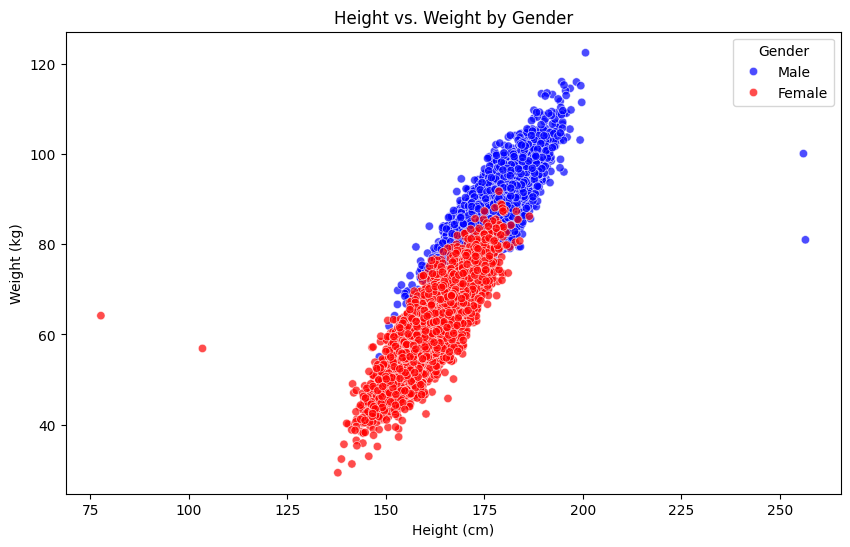

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Weight_height, x='Height', y='Weight', hue='Gender', palette={'Male': 'blue', 'Female': 'red'},marker='o', alpha=0.7)
plt.title('Height vs. Weight by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.show()

### Câu 4
##### Tạo mô hình Hồi quy tuyến tính cho tập dữ liệu trên dùng Sklearn. Với đầu vào là chiều
##### cao, dữ liệu nhãn là cân nặng. In ra w0 và w1 đã tìm được.

In [5]:
x  = Weight_height[['Height']]
y = Weight_height['Weight']
model = LinearRegression()
model.fit(x,y)
W1 = model.coef_[0]
W0 = model.intercept_
print('w1 using Sklearn library is:', W1)
print('w0 using Sklearn library is:', W0)

w1 using Sklearn library is: 1.3438657969618544
w0 using Sklearn library is: -153.32574039476424


### Câu 5
##### Tính w0 và w1 với công thức ở slide số 9 và in ra.

In [6]:
def Calculating_slope_and_intercept(x,y):
    sum_x = np.sum(x)
    sum_xy = np.sum(x*y)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x*x)
    n = x.size
    w1 = (sum_xy - (1/n) * sum_x * sum_y) / ((sum_x2) - (1/n) * sum_x * sum_x)
    w0 = (1/n) * (sum_y  - w1 * sum_x)
    
    return w1,w0

W1_def,W0_def = Calculating_slope_and_intercept(x.values , y.values.reshape(-1,1))
print('w1 using formula is:', W1_def)
print('w0 using formula is:', W0_def)

w1 using formula is: 1.343865796961983
w0 using formula is: -153.32574039478592


### Câu 6
##### Vẽ đường linear với hệ số đã tìm ở trên lên trục tọa độ.

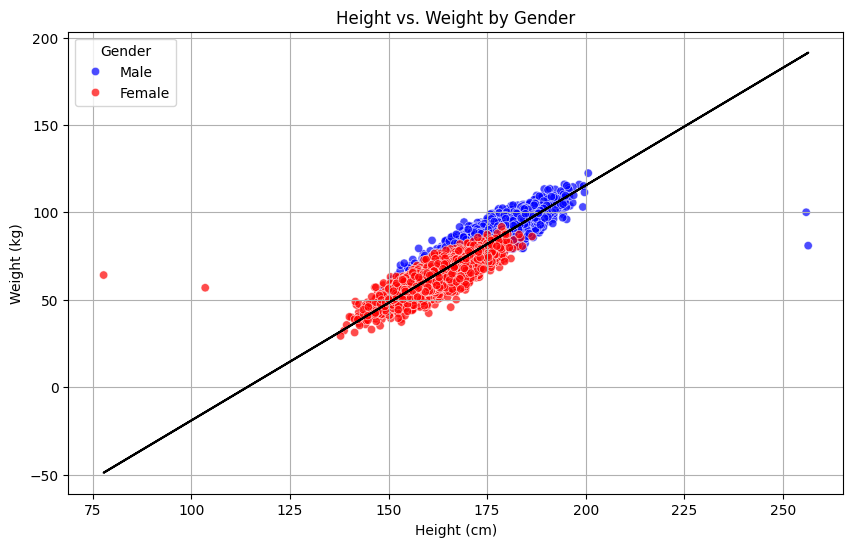

In [7]:
y_pred = W1 * x + W0
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Weight_height, x='Height', y='Weight', hue='Gender', palette={'Male': 'blue', 'Female': 'red'},marker='o', alpha=0.7)
plt.title('Height vs. Weight by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.plot(x,y_pred,c='black')
plt.grid()
plt.show()


### Câu 7
##### Dựa trên sai số của từng điểm dữ liệu, chúng ta sẽ loại bỏ các điểm dữ liệu nhiễu. In ra
##### giá trị sai số của 10% điểm dữ liệu có sai số cao nhất.

In [8]:
# Thêm cột "Predicted_Weight" vào DataFrame để lưu trữ trọng lượng dự đoán thông qua y_pred được dự đoán tự mô hình trên
Weight_height['Predicted_Weight'] =  y_pred

# Thêm cột "Residuals" vào DataFrame để tính toán và lưu trữ sai số
Weight_height['Residuals'] = np.abs(Weight_height['Weight'] - Weight_height['Predicted_Weight'])

# Sắp xếp giảm dần theo cột "Residuals"
data_err = Weight_height.sort_values(by='Residuals', ascending= False)

# In ra 10% điểm dữ liệu có sai số cao nhất
data_err_10percent = data_err.head(int(len(Weight_height) * 0.1))

# In ra tệp dữ liệu 10% sai số cao nhất
print(data_err_10percent)

# Loại bỏ các điểm gây nhiễu ra khỏi tệp dữ liệu
Weight_height = Weight_height.drop(data_err_10percent.index)

      Gender      Height      Weight  Predicted_Weight   Residuals
7533  Female   77.719875   64.162190        -48.880658  113.042849
2862    Male  256.446957   80.975597        191.304554  110.328957
67      Male  255.944040  100.080744        190.628700   90.547956
7675  Female  103.490868   56.892763        -14.247903   71.140666
7821  Female  165.768177   45.797233         69.444443   23.647210
...      ...         ...         ...               ...         ...
8301  Female  171.916362   68.607734         77.706778    9.099044
4791    Male  168.106281   81.683474         72.586541    9.096933
6135  Female  165.429002   59.892869         68.988637    9.095768
9140  Female  163.426412   57.201707         66.297425    9.095719
7665  Female  158.307115   50.323588         59.417777    9.094189

[1000 rows x 5 columns]


### Câu 8
##### In các điểm dữ liệu có sai số cao nhất đó với màu vàng.

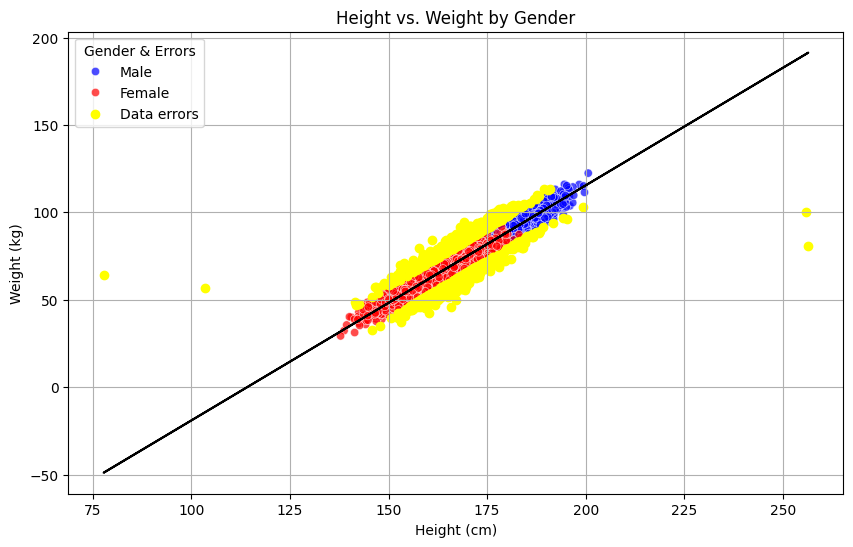

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Weight_height, x='Height', y='Weight', hue='Gender', palette={'Male': 'blue', 'Female': 'red'},marker='o', alpha=0.7)
plt.title('Height vs. Weight by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.plot(x,y_pred,c='black')
plt.scatter(data_err_10percent['Height'],data_err_10percent['Weight'],c= 'yellow',label = "Data errors")
plt.legend(title='Gender & Errors')
plt.grid()
plt.show()